<a href="https://colab.research.google.com/github/Tilanwishwajith-ai/ML-project/blob/main/final_notebook03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code review Seacion03

In [ ]:
# Import the pandas library, which is used for data manipulation and analysis
import pandas as pd


Code review Seacion03

In [ ]:
# Load the CSV file into a pandas DataFrame from the specified path
data = pd.read_csv('/content/clasificatione (1) (1).csv')


Code review Seacion03

In [ ]:
# Display the first five rows of the DataFrame to get a quick look at the data
data.head()


Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0   68    1        0        0          0               1      2        1   
1   50    1        1        1          2               0      1        1   
2   58    1        2        2          4               0      1        1   
3   58    1        0        0          0               1      2        1   
4   47    1        1        0          1               1      2        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0           4                1                    1                      24   
1          35                1                    1                      14   
2          63                1                    1                      14   
3          18                1                    1                       2   
4          41                1                    1                       3   

   Reginol_Node_Positive  Survival_Months  Mortality_Status  
0                      1               60                 1  
1                      5               62                 1  
2                      7               75                 1  
3                      1               84                 1  
4                      1               50                 1

Code review Seacion03

In [ ]:
# Display information about the DataFrame, including column names, data types, and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     3260 non-null   int64
 1   Sex                     3260 non-null   int64
 2   T_Stage                 3260 non-null   int64
 3   N_Stage                 3260 non-null   int64
 4   6th_Stage               3260 non-null   int64
 5   Differentiated          3260 non-null   int64
 6   Grade                   3260 non-null   int64
 7   A_Stage                 3260 non-null   int64
 8   Tumor_Size              3260 non-null   int64
 9   Estrogen_Status         3260 non-null   int64
 10  Progesterone_Status     3260 non-null   int64
 11  Regional_Node_Examined  3260 non-null   int64
 12  Reginol_Node_Positive   3260 non-null   int64
 13  Survival_Months         3260 non-null   int64
 14  Mortality_Status        3260 non-null   int64
dtypes: int64(15)
memory u

Code review Seacion03

In [ ]:
# Selecting relevant feature columns from the dataset to use as input (independent variables)
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size',
                'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive','Survival_Months'] # Removed extra space after Survival_Months

# Extract the input features (X) using the selected columns
X = data[feature_cols]

# Extract the target variable (y), which indicates mortality status (Alive | Dead)
y = data['Mortality_Status']

Code review Seacion03

In [ ]:
# Import the train_test_split function from scikit-learn to split the dataset
from sklearn.model_selection import train_test_split


Code review Seacion03

In [ ]:
# Split the features (X) and target labels (y) into training and testing sets
# - test_size=0.2: 20% of the data will be used for testing
# - random_state=42: ensures reproducibility of the split
# - stratify=y: preserves the proportion of classes in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Code review Seacion03

In [ ]:
# Import the VotingClassifier from scikit-learn's ensemble module
# This allows combining multiple models into one ensemble model for better performance
from sklearn.ensemble import VotingClassifier


Code review Seacion03

In [ ]:
# Import classification models from scikit-learn
from sklearn.linear_model import LogisticRegression      # Logistic Regression model
from sklearn.naive_bayes import GaussianNB                # Gaussian Naive Bayes model (imported but not used here)
from sklearn.neighbors import KNeighborsClassifier        # K-Nearest Neighbors classifier

# Import VotingClassifier to create an ensemble of multiple base classifiers
from sklearn.ensemble import VotingClassifier

# Define the base learners for the ensemble
# Each tuple contains a name and an instantiated model
base_learners = [
    ('lr', LogisticRegression()),                        # Logistic Regression as one base model
    ('knn', KNeighborsClassifier(n_neighbors=22))        # KNN with 22 neighbors as another base model
]

# Create a VotingClassifier ensemble using soft voting
# 'soft' voting means it uses predicted probabilities to make the final prediction
ensemble_learner = VotingClassifier(estimators=base_learners, voting='soft')


Code review Seacion03

In [ ]:
# Fit the ensemble VotingClassifier model on the training data
ensemble_learner.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=22))],
                 voting='soft')

Code review Seacion03

In [ ]:
# Use the trained ensemble model to make predictions on the test set
y_pred_ensemble_learner = ensemble_learner.predict(X_test)


Code review Seacion03

In [ ]:
# Import accuracy_score to evaluate the model's performance
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the ensemble model by comparing predictions with true labels
ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)

# Print the accuracy score of the ensemble classifier
print("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)


The voting ensemble classifier accuracy is:  0.9141104294478528


Code review Seacion03

Text(0.5, 1.0, 'Ensemble Learner Confusion Matrix')

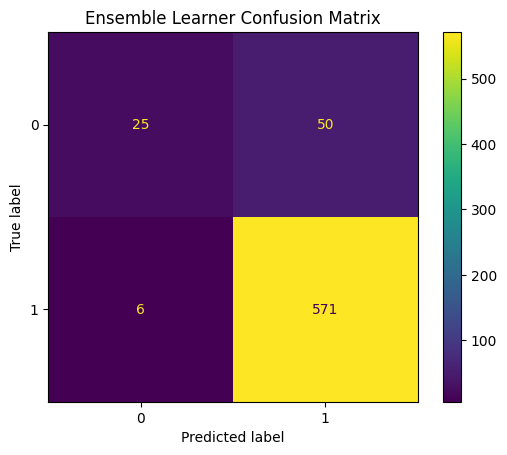

In [ ]:
# Import functions to compute and display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix for the test set using true and predicted labels
# 'labels=ensemble_learner.classes_' ensures consistent label ordering
ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)

# Create a ConfusionMatrixDisplay object for visual representation
ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test, display_labels=ensemble_learner.classes_)

# Plot the confusion matrix
ensemble_learner_disp.plot()

# Add a title to the confusion matrix plot
ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")


Code review Seacion03

In [ ]:

# Import classification_report to get detailed performance metrics for each class
from sklearn.metrics import classification_report

# Print the classification report showing precision, recall, F1-score, and support for each class
print("Ensemble Learner Classification Report\n", classification_report(y_test, y_pred_ensemble_learner))


Ensemble Learner Classification Report
               precision    recall  f1-score   support

           0       0.81      0.33      0.47        75
           1       0.92      0.99      0.95       577

    accuracy                           0.91       652
   macro avg       0.86      0.66      0.71       652
weighted avg       0.91      0.91      0.90       652



Code review Seacion03

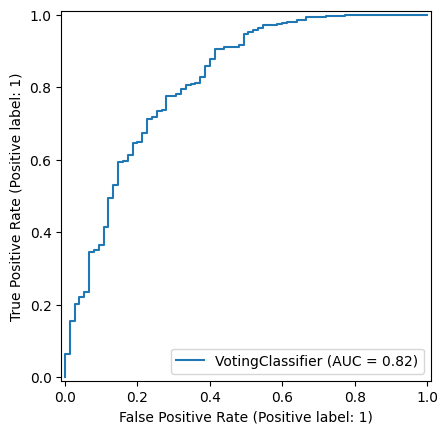

In [ ]:
# Import RocCurveDisplay to visualize the Receiver Operating Characteristic (ROC) curve
from sklearn.metrics import RocCurveDisplay
# Plot the ROC curve using the fitted ensemble model and the test data
# This helps evaluate the trade-off between true positive rate and false positive rate
ensemble_learner = RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)


Code review Seacion03

In [ ]:
# Import the pandas library, which is used for data manipulation and analysis
import pandas as pd


Code review Seacion03

In [ ]:
# Load the regression dataset from the specified CSV file into a pandas DataFrame
dataset = pd.read_csv('/content/regression_data (1).csv')


Code review Seacion03

In [ ]:
# Display concise summary of the DataFrame, including column names, data types, and non-null counts
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     373 non-null    int64
 1   Sex                     373 non-null    int64
 2   T_Stage                 373 non-null    int64
 3   N_Stage                 373 non-null    int64
 4   6th_Stage               373 non-null    int64
 5   Differentiated          373 non-null    int64
 6   Grade                   373 non-null    int64
 7   A_Stage                 373 non-null    int64
 8   Tumor_Size              373 non-null    int64
 9   Estrogen_Status         373 non-null    int64
 10  Progesterone_Status     373 non-null    int64
 11  Regional_Node_Examined  373 non-null    int64
 12  Reginol_Node_Positive   373 non-null    int64
 13  Survival_Months         373 non-null    int64
 14  Mortality_Status        373 non-null    int64
dtypes: int64(15)
memory usa

Code review Seacion03

In [ ]:
# Selecting relevant feature columns from the dataset to use as input (independent variables)
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size',
                'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive','Mortality_Status']

# Extract the input features (X) using the selected columns
X = data[feature_cols]

# Extract the target variable (y), which indicates mortality status (Alive | Dead)
y = data['Survival_Months']




Code review Seacion03

In [ ]:
# Import the function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the features (X) and target (y) into training and testing sets
# - test_size=0.2: 20% of the data will be used for testing
# - random_state=42: ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Code review Seacion03

In [ ]:
# Import the DecisionTreeRegressor model from scikit-learn for regression tasks
from sklearn.tree import DecisionTreeRegressor


Code review Seacion03

In [ ]:
# Instantiate the DecisionTreeRegressor model and fit it to the training data
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)


DecisionTreeRegressor()

Code review Seacion03

In [ ]:
# Use the trained DecisionTreeRegressor to make predictions on the test data
y_pred = DT_regressor.predict(X_test)


Code review Seacion03

In [ ]:
# Import metrics module from scikit-learn to evaluate regression performance
from sklearn import

# Calculate and print the Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# Calculate and print the Mean Squared Error (MSE)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# Calculate and print the R-squared (R²) score, which measures the proportion of variance explained by the model
print('R2:', metrics.r2_score(y_test, y_pred))


MAE: 22.763803680981596
MSE: 820.180981595092
R2: -0.791102246286131


Code review Seacion03

In [ ]:
# Import the tree module from scikit-learn for tree-specific functionality
from sklearn import tree
# Import pyplot from matplotlib to visualize the decision tree
from matplotlib import pyplot as plt


Code review Seacion03

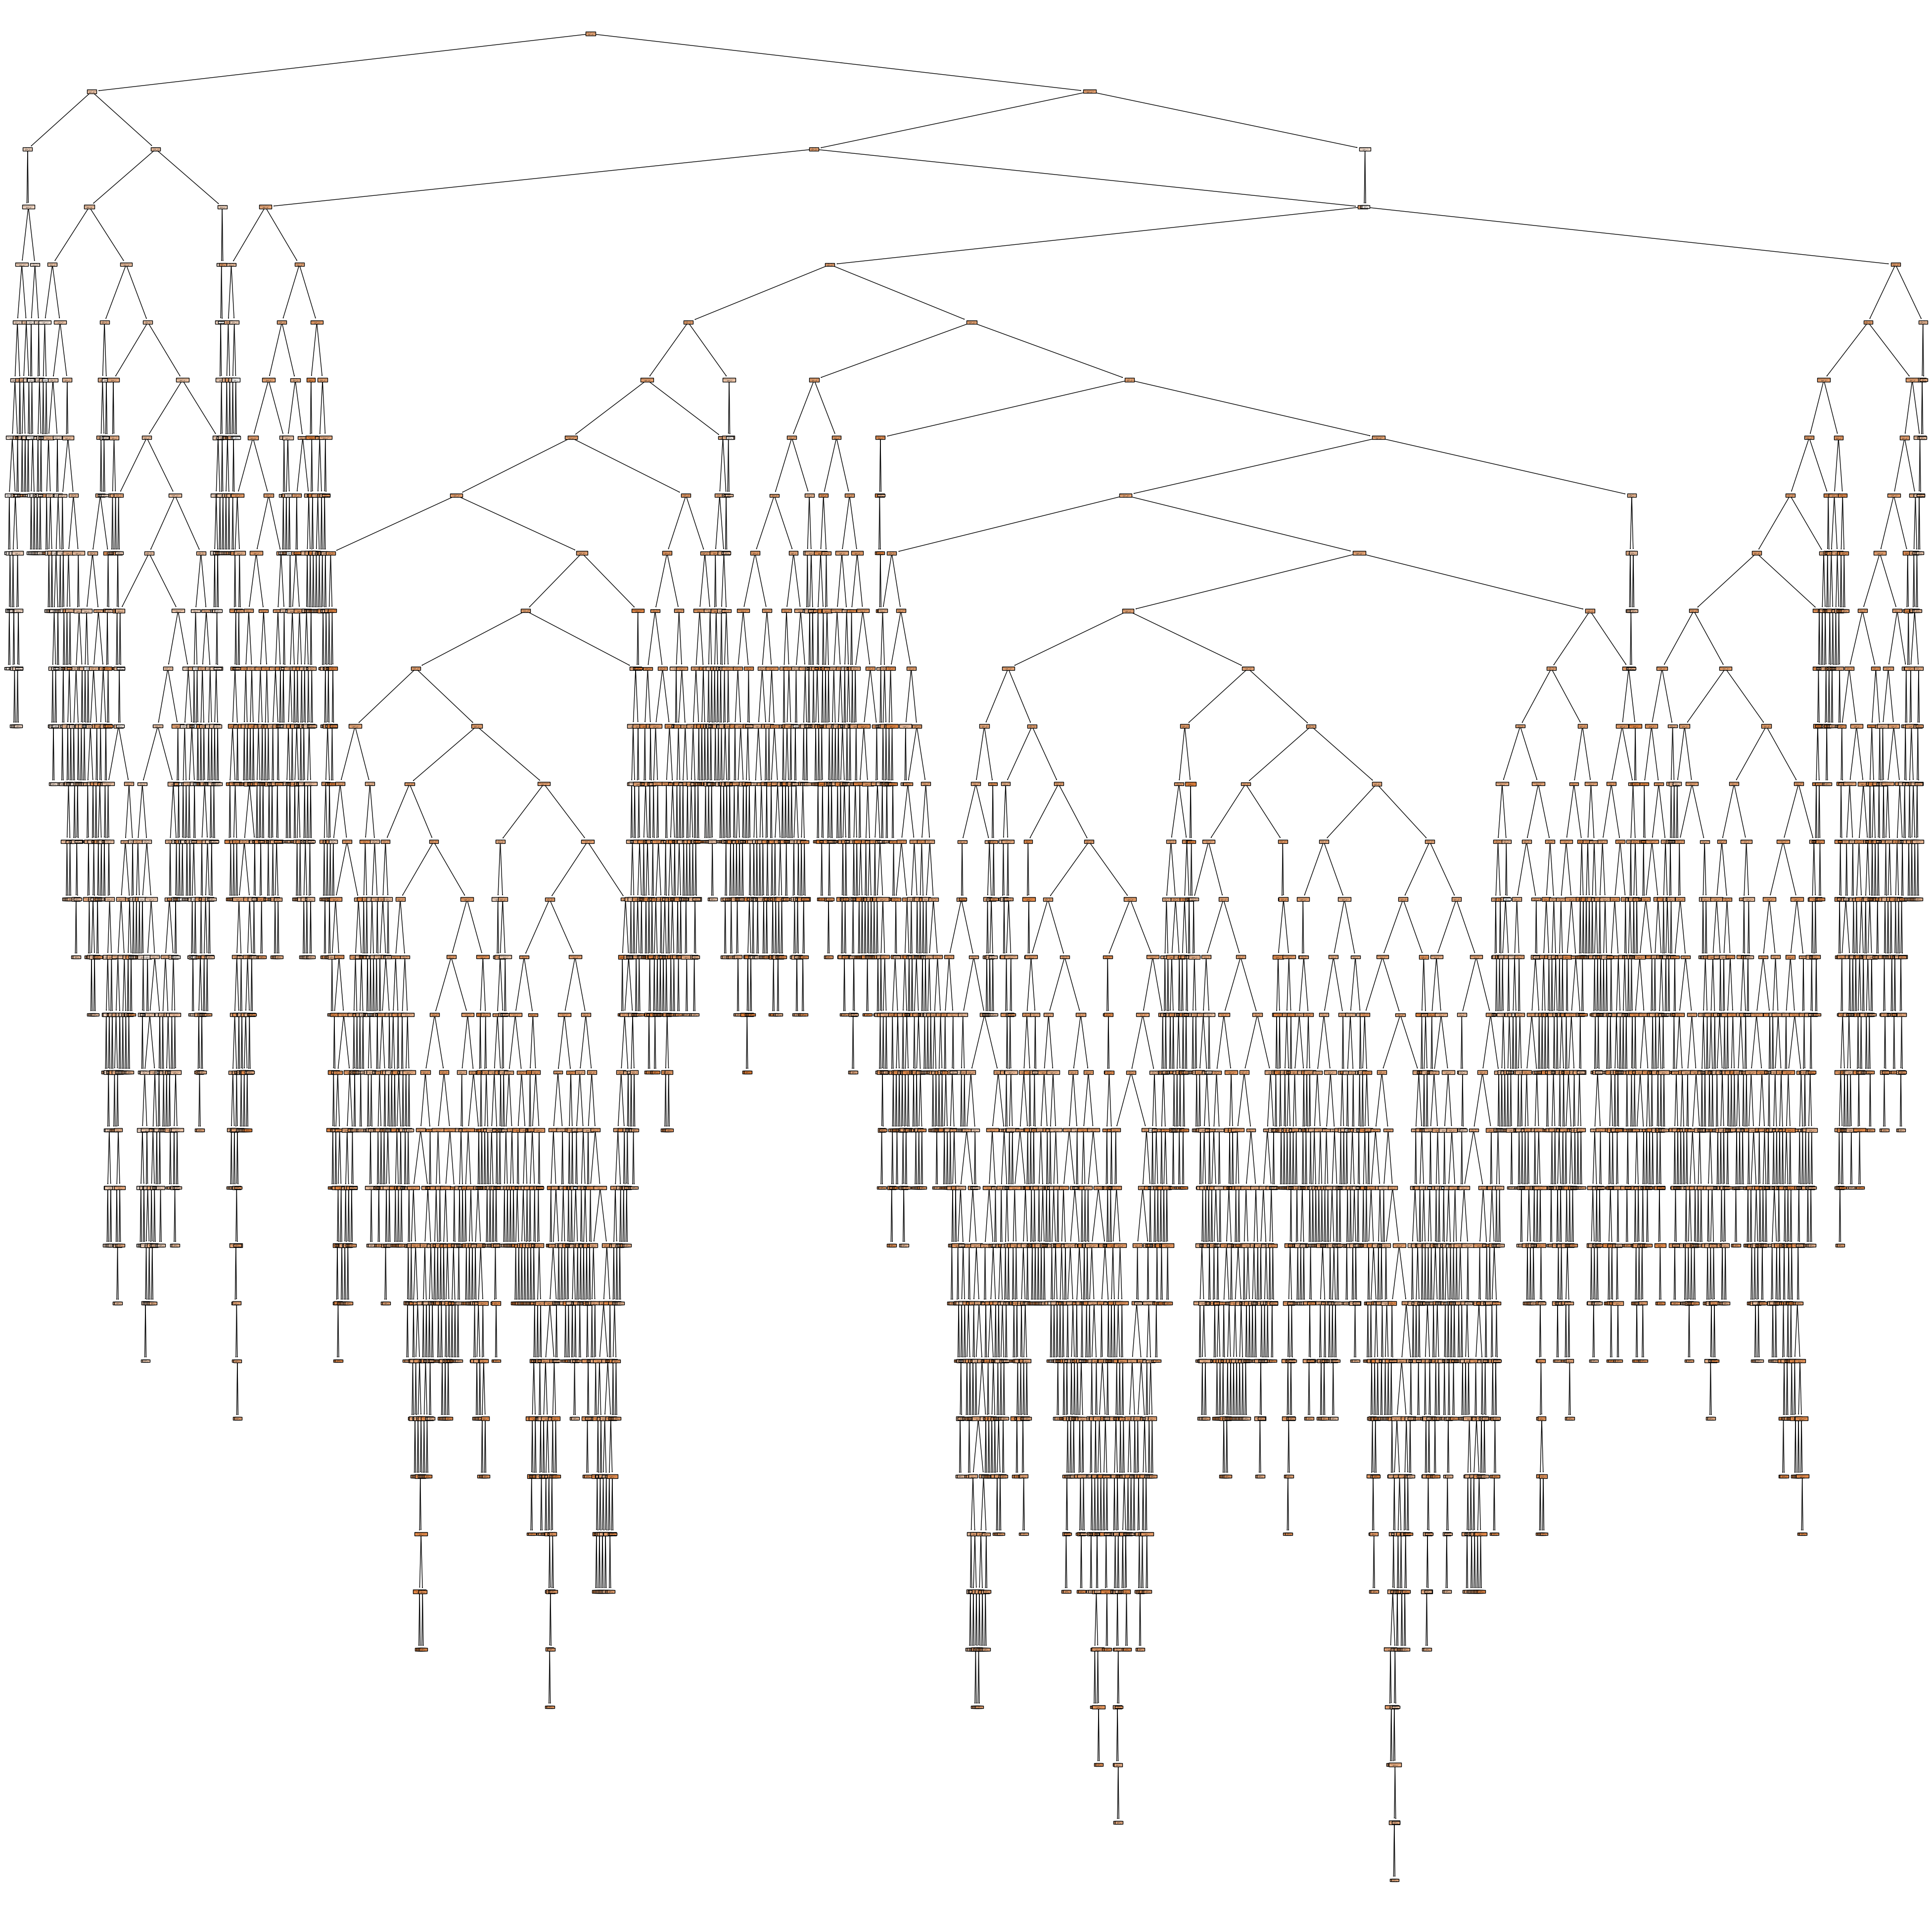

In [ ]:
# Create a figure with a specified size for better visibility of the tree
Tree_figure = plt.figure(figsize=(50,50))

# Plot the decision tree using the trained regressor
# - feature_names=list(X_train.columns) provides the column names for the features
# - filled=True adds color to the tree nodes based on class distribution
DT_Graph = tree.plot_tree(DT_regressor, feature_names=list(X_train.columns), filled=True)


Code review Seacion03

In [ ]:
# Instantiate a pruned decision tree regressor with a maximum depth of 4 to avoid overfitting
DT_regressor_pruned = DecisionTreeRegressor(max_depth=4)

# Fit the pruned decision tree model to the training data
DT_regressor_pruned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

Code review Seacion03

In [ ]:
# Use the trained pruned decision tree regressor to make predictions on the test data
y_pred_pruned = DT_regressor_pruned.predict(X_test)

Code review Seacion03

In [ ]:
# Import metrics from scikit-learn to evaluate the performance of the pruned model
from sklearn import metrics

# Calculate and print the Mean Absolute Error (MAE) for the pruned model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_pruned))

# Calculate and print the Mean Squared Error (MSE) for the pruned model
print('MSE:', metrics.mean_squared_error(y_test, y_pred_pruned))

# Calculate and print the R-squared (R²) score for the pruned model
print('R2:', metrics.r2_score(y_test, y_pred_pruned))

MAE: 16.031485835912406
MSE: 377.0887428770944
R2: 0.17651773258281722


Code review Seacion03

In [ ]:
# Create a figure with a very large size for better visibility of the pruned decision tree
Tree_figure_pruned = plt.figure(figsize=(200,200))

# Plot the pruned decision tree using the trained regressor
# - feature_names=list(X_train.columns) provides the column names for the features
# - filled=True adds color to the tree nodes based on feature value distribution
DT_Graph_pruned = tree.plot_tree(DT_regressor_pruned, feature_names=list(X_train.columns), filled=True)